In [1]:
pwd

'C:\\Users\\David Hintz\\Documents\\Python\\Portfolio Analysis'

# Portfolio Positions Analysis

## Initial Imports

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Account Allocations on Separate Pie Charts

Clean the account allocations data set.

In [46]:
acct_allocations = pd.read_csv('account_allocations.csv')

In [58]:
acct_allocations.head()

,Account Nickname,Domestic Stock,Foreign Stock,Bonds,Short term,Other
0,Brokerage,73.3,1.2,12.8,13.6,-0.9
1,Roth,73.9,13.4,6.2,2.8,3.7
2,SwRI Rollover,62.0,4.5,6.5,26.8,0.2
3,UL 401k,50.4,25.2,24.0,0.2,0.2


In [47]:
acct_allocations.drop('Account Name', axis=1, inplace=True)

In [59]:
acct_allocs = acct_allocations.set_index('Account Nickname').transpose()

In [60]:
acct_allocs[acct_allocs < 0] = 0

In [147]:
acct_allocs

Account Nickname,Brokerage,Roth,SwRI Rollover,UL 401k
Domestic Stock,73.3,73.9,62.0,50.4
Foreign Stock,1.2,13.4,4.5,25.2
Bonds,12.8,6.2,6.5,24.0
Short term,13.6,2.8,26.8,0.2
Other,0.0,3.7,0.2,0.2


In [62]:
accounts = [acct for acct in acct_allocs.columns]
accounts

['Brokerage', 'Roth', 'SwRI Rollover', 'UL 401k']

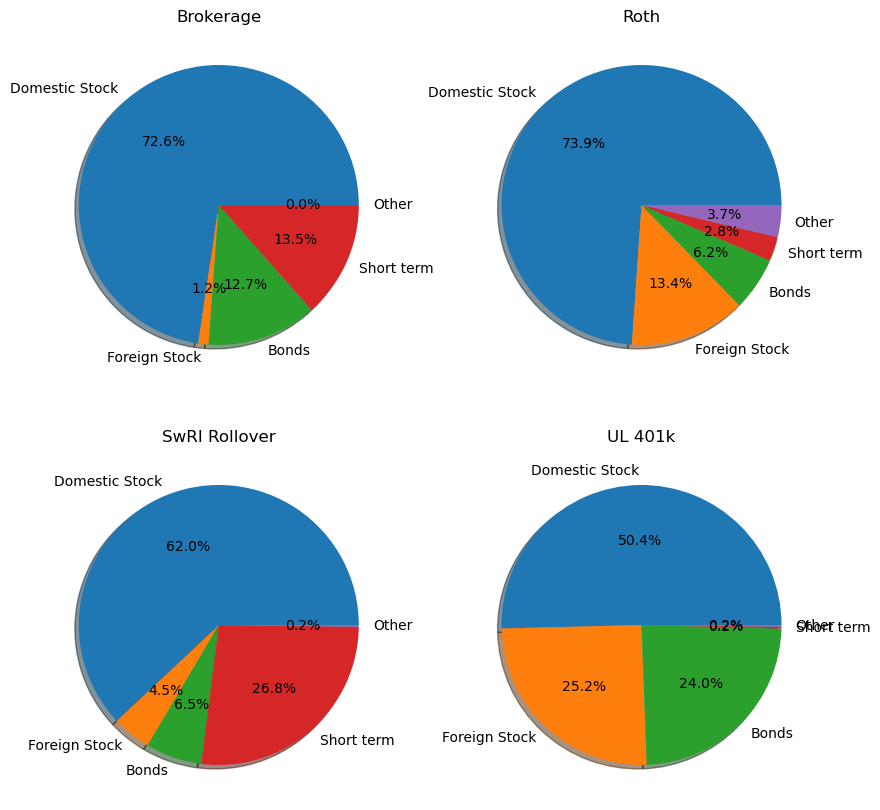

In [150]:
pie_rows = 2
pie_cols = 2

fig, ax = plt.subplots(pie_rows, pie_cols, figsize=(10,10))

for i, acct in enumerate(accounts):
    row, col = divmod(i, pie_cols)
    ax[row, col].pie(acct_allocs[acct], labels=acct_allocs.index, shadow=True, autopct='%1.1f%%')
    ax[row, col].set_title(acct)

Determine total overall account portfolio allocations based on fund sizes.

In [115]:
curr_positions = pd.read_csv('Pos_3_23_2024.csv')

Remove rows that aren't used for analysis.

In [116]:
pos = curr_positions.drop(columns=['Quantity', 'Last Price', 'Last Price Change', 'Today\'s Gain/Loss Dollar', 'Today\'s Gain/Loss Percent', 'Cost Basis Total', 'Average Cost Basis', 'Type'])

Clean data set to exclude rows outside of 4 main fidelity accounts.

In [117]:
rows_to_drop = pos[(pos['Account Number'] != 'X83787064') & (pos['Account Number'] != '220468797') & (pos['Account Number'] != '221575194') & (pos['Account Number'] != '67762')]

In [118]:
pos = pos.drop(rows_to_drop.index)

Convert current value from string to floats

In [123]:
pos['Current Value'] = pos['Current Value'].apply(lambda s: float(s[1:]))

Get totals for each account and merge with account allocations dataframe.

In [127]:
acct_values = pos.groupby('Account Number')['Current Value'].sum()

In [132]:
acct_values

Account Number
220468797    105035.80
221575194    380778.38
67762        134527.31
X83787064     99921.46
Name: Current Value, dtype: float64

In [137]:
num_name = {
    "220468797" : 'Roth',
    "221575194" : 'SwRI Rollover',
    "67762" : 'UL 401k',
    "X83787064" : 'Brokerage'
}

In [141]:
acct_values = acct_values.reset_index()

In [144]:
acct_values['Account Nickname'] = acct_values['Account Number'].apply(lambda s: num_name[s])

,Account Number,Current Value,Account Nickname
0,220468797,105035.80,Roth
1,221575194,380778.38,SwRI Rollover
2,67762,134527.31,UL 401k
3,X83787064,99921.46,Brokerage


,Account Number,Account Name,Symbol,Description,Current Value,Total Gain/Loss Dollar,Total Gain/Loss Percent,Percent Of Account
0,X83787064,Individual Brokerage,912797FS1,UNITED STATES TREAS BILLS ZERO CPN 0.00000% 06...,9884.20,+$135.38,+1.38%,9.89%
1,X83787064,Individual Brokerage,91282CDB4,UNITED STATES TREAS SER AT-2024 0.62500% 10/15...,2924.52,+$36.54,+1.26%,2.93%
2,X83787064,Individual Brokerage,FDLXX,FIDELITY TREASURY ONLY MONEY MARKET FD,12709.10,NaN,NaN,12.72%
3,X83787064,Individual Brokerage,FSKAX,FIDELITY TOTAL MARKET INDEX FUND,24361.14,+$2356.07,+10.70%,24.38%
4,X83787064,Individual Brokerage,FXAIX,FIDELITY 500 INDEX FUND,25608.28,+$2608.28,+11.34%,25.63%


Fund allocations per account.

In [7]:
fund_allocations = pd.read_csv('fund_allocations.csv')

In [8]:
fund_allocations.head()

,Symbol,Type,Dom Stock %,Int Stock %,Dom Bond %,Int Bond %,Cash,Other,Expense Ratio
0,31565A745,MIXED,54.68,35.42,8.93,0.97,0.00,0.0,0.07
1,31617E836,MIXED,96.48,3.31,0.07,0.00,0.14,0.0,0.43
2,62400PKP4,BOND,0.00,0.00,100.00,0.00,0.00,0.0,0.00
3,912797FS1,BOND,0.00,0.00,100.00,0.00,0.00,0.0,0.00
4,912797GX9,BOND,0.00,0.00,100.00,0.00,0.00,0.0,0.00
